# Rendu api rest sur la base de donnée movie

In [1]:
import pandas as pd
import requests
from datetime import datetime,date
import matplotlib.pyplot as plt

## Import des base de données

### Star by birthdate

In [2]:
birthdate=1930
dfStars=pd.read_json(f"http://127.0.0.1:8000/Stars/by_year/{birthdate}")
dfStars.set_index('id',inplace=True)
dfStars

,name,birthdate
id,,
273359,Abel Fernandez,1930-01-01
721031,Alejandro Rey,1930-01-01
193238,Alfie Curtis,1930-01-01
339141,Alvin Greenman,1930-01-01
665708,Angela Paton,1930-01-01
...,...,...
888845,Warren Vanders,1930-01-01
404298,Will Hutchins,1930-01-01
431499,William Joyce,1930-01-01


### Film par titre partiel

In [25]:
part_title="the man who"
part_title=part_title.replace(' ','%20')
dfMoviePartTitle=pd.read_json(f"http://127.0.0.1:8000/Movies/by_parttitle?n={part_title}")
dfMoviePartTitle.set_index('id',inplace=True)
dfMoviePartTitle

,title,year,duration,director,actors
id,,,,,
25452,The Man Who Knew Too Much,1934,75,"{'name': 'Alfred Hitchcock', 'birthdate': '189...","[{'name': 'Alfred Hitchcock', 'birthdate': '18..."
49470,The Man Who Knew Too Much,1956,120,"{'name': 'Alfred Hitchcock', 'birthdate': '189...","[{'name': 'Doris Day', 'birthdate': '1922-01-0..."
56217,The Man Who Shot Liberty Valance,1962,123,"{'name': 'John Ford', 'birthdate': None, 'id':...","[{'name': 'James Stewart', 'birthdate': '1908-..."
73341,The Man Who Would Be King,1975,129,"{'name': 'John Huston', 'birthdate': '1906-01-...","[{'name': 'Sean Connery', 'birthdate': '1930-0..."
243133,The Man Who Wasn't There,2001,116,"{'name': 'Joel Coen', 'birthdate': '1954-11-29...",[]


### Stats par acteur

In [24]:
mini=50
dfActors=pd.read_json(f"http://127.0.0.1:8000/stars/count_by_stars/?minc={mini}")
dfActors

,0,1,2,3
0,"{'birthdate': '1947-07-30', 'name': 'Arnold Sc...",56,1970,2019
1,"{'birthdate': '1930-05-31', 'name': 'Clint Eas...",63,1955,2018
2,"{'birthdate': '1942-07-13', 'name': 'Harrison ...",63,1966,2020
3,"{'birthdate': '1956-07-09', 'name': 'Tom Hanks...",68,1980,2020
4,"{'birthdate': '1946-07-06', 'name': 'Sylvester...",72,1969,2019
5,"{'birthdate': '1930-08-25', 'name': 'Sean Conn...",73,1954,2012
6,"{'birthdate': '1884-03-16', 'name': 'Harrison ...",86,1915,1932
7,"{'birthdate': '1907-05-26', 'name': 'John Wayn...",172,1926,1976


## Formatage du dictionnaire relatif à l'acteur

In [5]:
response=requests.get(f"http://127.0.0.1:8000/stars/count_by_stars/?minc={mini}")
response
if response.status_code==200:
    print('OK')
else:
    print('Error',response.status_code, response.json(),sep=',')

OK


In [6]:
data_json=response.json()
data_json


[[{'birthdate': '1947-07-30', 'name': 'Arnold Schwarzenegger', 'id': 216},
  56,
  1970,
  2019],
 [{'birthdate': '1930-05-31', 'name': 'Clint Eastwood', 'id': 142},
  63,
  1955,
  2018],
 [{'birthdate': '1942-07-13', 'name': 'Harrison Ford', 'id': 148},
  63,
  1966,
  2020],
 [{'birthdate': '1956-07-09', 'name': 'Tom Hanks', 'id': 158}, 68, 1980, 2020],
 [{'birthdate': '1946-07-06', 'name': 'Sylvester Stallone', 'id': 230},
  72,
  1969,
  2019],
 [{'birthdate': '1930-08-25', 'name': 'Sean Connery', 'id': 125},
  73,
  1954,
  2012],
 [{'birthdate': '1884-03-16', 'name': 'Harrison Ford', 'id': 1230},
  86,
  1915,
  1932],
 [{'birthdate': '1907-05-26', 'name': 'John Wayne', 'id': 78},
  172,
  1926,
  1976]]

In [7]:
dfActors=pd.DataFrame(data_json)
dfActors

,0,1,2,3
0,"{'birthdate': '1947-07-30', 'name': 'Arnold Sc...",56,1970,2019
1,"{'birthdate': '1930-05-31', 'name': 'Clint Eas...",63,1955,2018
2,"{'birthdate': '1942-07-13', 'name': 'Harrison ...",63,1966,2020
3,"{'birthdate': '1956-07-09', 'name': 'Tom Hanks...",68,1980,2020
4,"{'birthdate': '1946-07-06', 'name': 'Sylvester...",72,1969,2019
5,"{'birthdate': '1930-08-25', 'name': 'Sean Conn...",73,1954,2012
6,"{'birthdate': '1884-03-16', 'name': 'Harrison ...",86,1915,1932
7,"{'birthdate': '1907-05-26', 'name': 'John Wayn...",172,1926,1976


### Conversion en dictionnaire

In [8]:
data_flat=[{**director_dict,'movie_count':movie_count,'year_first_movie':first,'year_last_movie':last}for director_dict,movie_count,first,last in data_json]
data_flat

[{'birthdate': '1947-07-30',
  'name': 'Arnold Schwarzenegger',
  'id': 216,
  'movie_count': 56,
  'year_first_movie': 1970,
  'year_last_movie': 2019},
 {'birthdate': '1930-05-31',
  'name': 'Clint Eastwood',
  'id': 142,
  'movie_count': 63,
  'year_first_movie': 1955,
  'year_last_movie': 2018},
 {'birthdate': '1942-07-13',
  'name': 'Harrison Ford',
  'id': 148,
  'movie_count': 63,
  'year_first_movie': 1966,
  'year_last_movie': 2020},
 {'birthdate': '1956-07-09',
  'name': 'Tom Hanks',
  'id': 158,
  'movie_count': 68,
  'year_first_movie': 1980,
  'year_last_movie': 2020},
 {'birthdate': '1946-07-06',
  'name': 'Sylvester Stallone',
  'id': 230,
  'movie_count': 72,
  'year_first_movie': 1969,
  'year_last_movie': 2019},
 {'birthdate': '1930-08-25',
  'name': 'Sean Connery',
  'id': 125,
  'movie_count': 73,
  'year_first_movie': 1954,
  'year_last_movie': 2012},
 {'birthdate': '1884-03-16',
  'name': 'Harrison Ford',
  'id': 1230,
  'movie_count': 86,
  'year_first_movie': 19

In [9]:
dfActors=pd.DataFrame(data_flat)
dfActors

,birthdate,name,id,movie_count,year_first_movie,year_last_movie
0,1947-07-30,Arnold Schwarzenegger,216,56,1970,2019
1,1930-05-31,Clint Eastwood,142,63,1955,2018
2,1942-07-13,Harrison Ford,148,63,1966,2020
3,1956-07-09,Tom Hanks,158,68,1980,2020
4,1946-07-06,Sylvester Stallone,230,72,1969,2019
5,1930-08-25,Sean Connery,125,73,1954,2012
6,1884-03-16,Harrison Ford,1230,86,1915,1932
7,1907-05-26,John Wayne,78,172,1926,1976


### Modification du birthdate en date

In [10]:
#def fromisoformat_or_none(bd):
 #   return date.fromisoformat(bd) if db is not None else None
dfActors.birthdate=dfActors.birthdate.apply(
    lambda bd: date.fromisoformat(bd) if bd is not None else None )
dfActors

,birthdate,name,id,movie_count,year_first_movie,year_last_movie
0,1947-07-30,Arnold Schwarzenegger,216,56,1970,2019
1,1930-05-31,Clint Eastwood,142,63,1955,2018
2,1942-07-13,Harrison Ford,148,63,1966,2020
3,1956-07-09,Tom Hanks,158,68,1980,2020
4,1946-07-06,Sylvester Stallone,230,72,1969,2019
5,1930-08-25,Sean Connery,125,73,1954,2012
6,1884-03-16,Harrison Ford,1230,86,1915,1932
7,1907-05-26,John Wayne,78,172,1926,1976


## Graphique avec matplotlib

### repartition par année des films

In [11]:
dfCountMovieByYear=pd.read_json("http://127.0.0.1:8000/movies/stats_by_year") #import de la bdd
dfCountMovieByYear

,year,counter,mini,maxi,avg
0,1915,1,50,50,50.0000
1,1916,1,50,50,50.0000
2,1917,7,50,50,50.0000
3,1918,10,50,60,51.0000
4,1919,10,50,57,50.7000
...,...,...,...,...,...
101,2016,15,3,161,97.6667
102,2017,22,3,164,95.8636
103,2018,20,1,149,98.4000
104,2019,28,2,209,104.3333


### Movies by year

(1970.0, 2020.0)

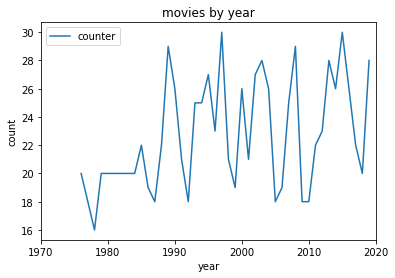

In [12]:
dfCountMovieByYearGraph=dfCountMovieByYear[dfCountMovieByYear.counter > 15][['year','counter']].set_index('year').plot()
dfCountMovieByYearGraph.set_title('movies by year')
dfCountMovieByYearGraph.set_xlabel('year')
dfCountMovieByYearGraph.set_ylabel('count')
dfCountMovieByYearGraph.set_xlim(1970,2020)

### Repartition des naissances de Star

In [13]:
dfCountBirthdateActor=pd.read_json("http://127.0.0.1:8000/Stars/count_by_year")
dfCountBirthdateActor['Year']=dfCountBirthdateActor.birthdate.apply(
    lambda bd: int(date.fromisoformat(bd).year) if bd is not None else None ) #reucpération de l'année
dfCountBirthdateActor


,birthdate,counter,Year
0,None,0,NaN
1,1846-01-01,1,1846.0
2,1848-01-01,2,1848.0
3,1849-01-01,1,1849.0
4,1850-01-01,1,1850.0
...,...,...,...
191,2004-01-01,1,2004.0
192,2005-01-01,2,2005.0
193,2006-01-01,1,2006.0
194,2008-01-01,2,2008.0


### reaprtition des naissances des acteurs entre 1900 et 2000

<AxesSubplot:title={'center':'reaprtition des naissances des acteurs entre 1900 et 2000'}, xlabel='Year', ylabel='Nombre de Naissance'>

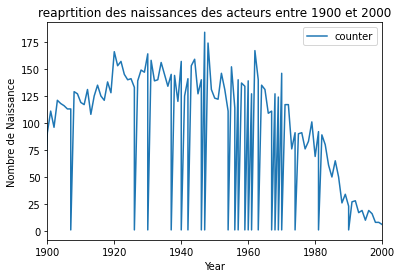

In [14]:
dfCountBirthdateActor.plot(x="Year",
                           y="counter",
                           xlim=(1900,2000),
                           ylabel="Nombre de Naissance",
                           title="reaprtition des naissances des acteurs entre 1900 et 2000")

## Top 10 des Stars

In [15]:
dfActors10=dfActors.groupby('movie_count').head(10) # on recupere le top 10 ici 
dfActors10

,birthdate,name,id,movie_count,year_first_movie,year_last_movie
0,1947-07-30,Arnold Schwarzenegger,216,56,1970,2019
1,1930-05-31,Clint Eastwood,142,63,1955,2018
2,1942-07-13,Harrison Ford,148,63,1966,2020
3,1956-07-09,Tom Hanks,158,68,1980,2020
4,1946-07-06,Sylvester Stallone,230,72,1969,2019
5,1930-08-25,Sean Connery,125,73,1954,2012
6,1884-03-16,Harrison Ford,1230,86,1915,1932
7,1907-05-26,John Wayne,78,172,1926,1976


### nombre de film 

<AxesSubplot:title={'center':'Nombre de films joué par les 10 meilleurs acteurs'}, xlabel='name', ylabel='nombre de films joué'>

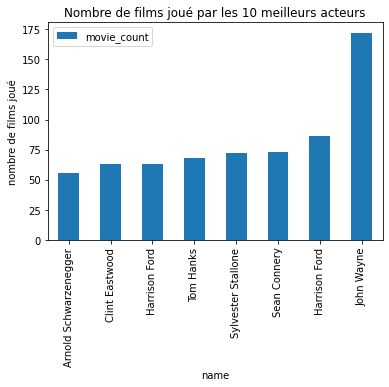

In [21]:
dfActors10[dfActors10.movie_count > 10][['name','movie_count']].set_index('name').plot(kind='bar',ylabel="nombre de films joué",title="Nombre de films joué par les 10 meilleurs acteurs")

### Carriere des acteurs 

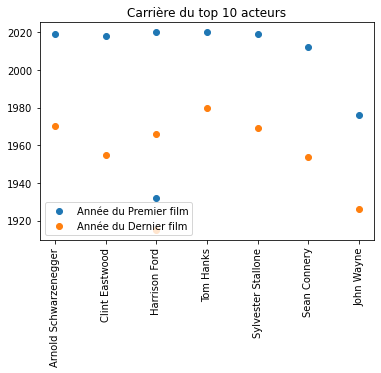

In [23]:
fig = plt.figure()

plt.scatter(dfActors10.name,dfActors10.year_last_movie)    
plt.scatter(dfActors10.name,dfActors10.year_first_movie)

plt.title("Carrière du top 10 acteurs")
plt.legend(["Année du Premier film","Année du Dernier film"])
plt.ylabel="Année"
plt.xticks(rotation=90)
plt.set_ylim=(min(dfActors10.year_first_movie),max(dfActors10.year_last_movie))
plt.show()